<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/ivp_bvp_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html

# First Order Initial Value Problem


In [ ]:
# EDO: y' = -0.5*y, 0 <= t <= 10 em geral: y' = f(t,y)
# BCs: y(0) = 2

import numpy as np
from scipy.integrate import solve_ivp

tL = 0
tR = 10
yL = 2

N = 5
sol = solve_ivp(fun=lambda t,y: -0.5*y,
                t_span=[tL,tR],
                y0=[2],
                method='RK45',
                t_eval=np.linspace(start=tL,
                                   stop=tR,
                                   num=N+1,
                                   endpoint=True))

print('sol.t = ', sol.t)
print('sol.y[0] = ', sol.y[0])

sol.t =  [ 0.  2.  4.  6.  8. 10.]
sol.y[0] =  [2.         0.73534013 0.2706912  0.09965105 0.03669163 0.01350782]


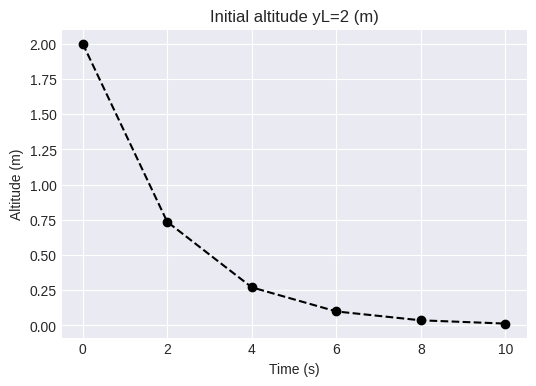

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(sol.t, sol.y[0], 'ko--')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial altitude yL={yL} (m)')
plt.show()

# Second Order Initial Value Problem

In [ ]:
# IVP problem
# EDO: y'' = -g, 0 <= t <= 5
# BCs: y(0) = 0, y'(0) = 25

'''
Transforming a second order ODE to a system of first order ODEs
one second order ODE: y'' = f(t,y,y')
--> two first order ODEs with two unkowns y and v: y' = v (1) and v' = f(t,y,v)
--> one system of first order ODEs: [y v]' = [v f(t,y,u)] = fun, in Scipy, [y[1] -g]
--> with an initial BC: [y v]_init = [yL vL], in Scipy, [0 25]
--> the system in Scipy variables denomination becomes,
    y' = [y[1] -g]
    y0 = [0 25]
'''

import numpy as np
from scipy.integrate import solve_ivp

tL = 0
tR = 5
yL0 = 0 # = y⁰(0) = initial altitude
yL1 = 25 # = y¹(0) = initial velocity
g = 9.8

N = 5
# no scipy, y = [altitude, velocidade] = [y v]' = [v f(t,y,u)]
sol = solve_ivp(fun=lambda t,y: np.array([y[1],-g]),
                t_span=[tL,tR],
                y0=[yL0, yL1],
                method='RK45',
                t_eval=np.linspace(start=tL,
                                   stop=tR,
                                   num=N+1,
                                   endpoint=True))

print('sol.t = ', sol.t)
print('altitude = sol.y[0] = ', sol.y[0])
print('velocidade = sol.y[1] = ', sol.y[1])

sol.t =  [0. 1. 2. 3. 4. 5.]
altitude = sol.y[0] =  [ 0.  20.1 30.4 30.9 21.6  2.5]
velocidade = sol.y[1] =  [ 25.   15.2   5.4  -4.4 -14.2 -24. ]


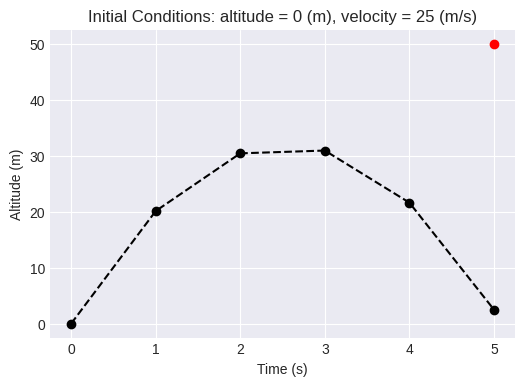

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(sol.t, sol.y[0], 'ko--')
plt.plot(5, 50, 'ro')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial Conditions: altitude = {yL0} (m), velocity = {yL1} (m/s)')
plt.show()

# Second Order Boundary Value Problem with Nonlinear Shooting Method

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

'''
# BVP peoblem 1
# EDO: y'' = -9.8, 0 <= t <= 5
# BCs: y(0) = 0, y(5) = 50

tL = 0
tR = 5
yL0 = 0 # = y⁰(0) = initial altitude
yR0 = 50 # = y⁰(5) = final altitude
N = 5
f = lambda t,y: -9.8
'''

# problem 2
# EDO: y'' = -2yy', 0 <= t <= 1
# BCs: y(0) = 0, y(1) = 1

tL = 0
tR = 1
yL0 = 0
yR0 = 1
N = 5
f = lambda t,y: -2*y[0]*y[1] # y = [altitude, velocidade]

# function to be called for diferent values of initial velocity
def ivpSolForGivenYL1(yL1):
    return solve_ivp(fun=lambda t,y: np.array([y[1],f(t,y)]),
                     t_span=[tL,tR],
                     y0=[yL0, yL1],
                     method='RK45',
                     t_eval=np.linspace(start=tL,
                                        stop=tR,
                                        num=N+1,
                                        endpoint=True))

# solving: searching for the initial value that satisfy,
# final altitude: sol.y[0][-1] = y(5) : right-hand BC
def objective(yL1):
  sol = ivpSolForGivenYL1(yL1)
  finalAltitude = sol.y[0][-1]
  return finalAltitude - yR0

yL1 = 25 # = y¹(0) = first guess for unkown initial velocity
yL1, = fsolve(objective, yL1)
print('Initial velocity, yL1 = ', yL1)

sol = ivpSolForGivenYL1(yL1)
print('sol.t = ', sol.t)
print('altitude = sol.y[0] = ', sol.y[0])
print('velocidade = sol.y[1] = ', sol.y[1])

Initial velocity, yL1 =  1.4392837004828758
sol.t =  [0.  0.2 0.4 0.6 0.8 1. ]
altitude = sol.y[0] =  [0.         0.28247003 0.53523585 0.73970102 0.89263969 1.        ]
velocidade = sol.y[1] =  [1.4392837  1.35940651 1.15279057 0.89223051 0.64200172 0.43781213]


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


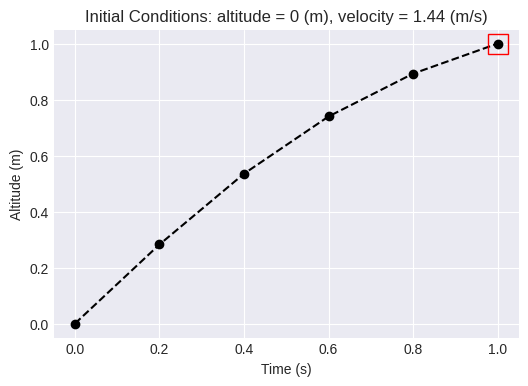

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(sol.t, sol.y[0], 'ko--')
plt.plot(tR, yR0, 'rs', markersize=14, markerfacecolor='none')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial Conditions: altitude = {yL0} (m), velocity = {yL1:.2f} (m/s)')
plt.show()

In [ ]:
# cos(x) = x or cos(x) - x = 0
# f(x) = 5 or f(x) - 5 = 0
import numpy as np
from scipy.optimize import fsolve

def objetivo(x):
  return np.cos(x) - x
  #return f(x) - 5

xInit = 1
r, = fsolve(objetivo, xInit)
print('r = ', r)

# fsolve is an iterative solver that search for the input of
# the objective function that nulify its return value.
# encontrar a entrada da function que retorna zero

r =  0.7390851332151607


# Second Order Boundary Value Problem with Linear Shooting Method

In [ ]:
# forma geral,
# EDO: y'' = p(t)y' + q(t)y + r(t), with tL ≤ t ≤ tR
# BCs: y(tL) = α, and y(tR) = β

# exemplo,
# EDO: y'' = -g, 0 <= t <= 5
# BCs: y(0) = 0, y(5) = 50

import numpy as np
from scipy.integrate import solve_ivp

p = lambda t: 0
q = lambda t: 0
r = lambda t: -9.8
tL = 0
tR = 5
alpha = yL0 = 0 # = y⁰(0) = initial altitude
beta = yR0 = 50 # = y⁰(5) = final altitude

N = 5

# Nonhomogeneous IVP Problem:
# EDO: y'' = p(t)y' + q(t)y + r(t), with tL ≤ t ≤ tR
# BCs: y(tL) = α, and y'(tL) = 0
sol1 = solve_ivp(fun=lambda t,y: np.array([y[1],
                                           p(t)*y[1] + q(t)*y[0] + r(t)]),
                 t_span=[tL,tR],
                 y0=[alpha, 0],
                 method='RK45',
                 t_eval=np.linspace(start=tL,
                                    stop=tR,
                                    num=N+1,
                                    endpoint=True))

print('final altitude with (0,0) initial Bcs is ', sol1.y[0][-1])

t = sol1.t
print('t = ', t)

# Homogeneous IVP Problem:
# EDO: y'' = p(t)y' + q(t)y, with tL ≤ t ≤ tR
# BCs: y(tL) = 0, and y'(tL) = 1
sol2 = solve_ivp(fun=lambda t,y: np.array([y[1],
                                           p(t)*y[1] + q(t)*y[0]]),
                 t_span=[tL,tR],
                 y0=[0, 1],
                 method='RK45',
                 t_eval=t)

print('final altitude with (0,1) initial Bcs is ', sol2.y[0][-1])

coeff = (beta - sol1.y[0][-1])/sol2.y[0][-1]
print('coeff = ', coeff)

y = sol1.y + coeff * sol2.y
print('y = ', y)
print('altitude = y[0] = ', y[0])
print('velocity = y[1] = ', y[1])

final altitude with (0,0) initial Bcs is  -122.49999999999991
t =  [0. 1. 2. 3. 4. 5.]
final altitude with (0,1) initial Bcs is  5.000000000000001
coeff =  34.49999999999998
y =  [[  0.   29.6  49.4  59.4  59.6  50. ]
 [ 34.5  24.7  14.9   5.1  -4.7 -14.5]]
altitude = y[0] =  [ 0.  29.6 49.4 59.4 59.6 50. ]
velocity = y[1] =  [ 34.5  24.7  14.9   5.1  -4.7 -14.5]


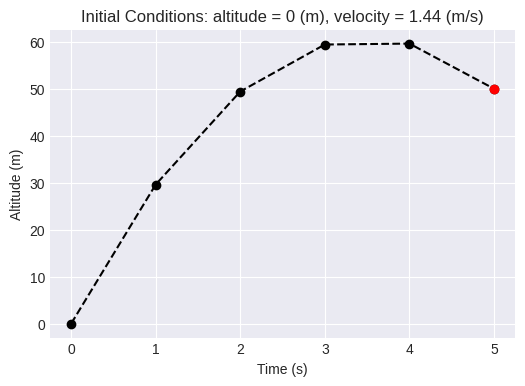

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(t, y[0], 'ko--')
plt.plot(tR, yR0, 'ro')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial Conditions: altitude = {yL0} (m), velocity = {yL1:.2f} (m/s)')
plt.show()

# Second Order BVP with Linear Finite Difference Method
https://towardsdatascience.com/solving-non-linear-differential-equations-numerically-using-the-finite-difference-method-1532d0863755

In [ ]:
import numpy as np

# EDO: y'' = p(t)y' + q(t)y + r(t), with tL ≤ t ≤ tR
# BCs: y(tL) = α, and y(tR) = β


# peoblem 1
# EDO: y'' = -9.8, 0 <= t <= 5
# BCs: y(0) = 0, y(0) = 50

p = lambda t: 0
q = lambda t: 0
r = lambda t: -9.8
tL = 0
tR = 5
alpha = yL0 = 0 # = y⁰(0) = initial altitude
beta = yR0 = 50 # = y⁰(5) = final altitude

N = 5
h = (tR - tL)/N
print('h = ', h)

t = np.linspace(tL, tR, N+1)
print('t = ', t)

'''
Central Difference Formulas for y' and y''
y'[i] = (y[i+1] - y[i-1])/(2*h)
y''[i] = (y[i-1] - 2*y[i] + y[i+1])/h**2

(y[i-1] - 2*y[i] + y[i+1])/h**2 = p(ti) * (y[i+1] - y[i-1])/(2*h)
                                + q(ti) * y[i]
                                + r(ti)

Discretized EDO, y[i-1] * (1/h**2 + p(ti)/(2*h))
               + y[i]   * (-2/h**2 - q(ti))
               + y[i+1] * (1/h**2 - p(ti)/(2*h)) = r(ti), for i in range(1,N)
BCs: y[0] = alpha
     y[N] = beta
Obs. for i in range(1,5) ~ i=1,2,3,4
'''

# Get A
A = np.zeros((N+1, N+1))
A[0, 0] = 1
A[N, N] = 1
for i in range(1, N):
  A[i, i-1] = 1/h**2 + p(t[i])/(2*h)
  A[i, i] = -2/h**2 - q(t[i])
  A[i, i+1] = 1/h**2 - p(t[i])/(2*h)
print('A = \n', A)

# Get b
b = np.zeros(N+1)
for i in range(1, N):
  b[i] = r(t[i])
b[0] = yL0
b[-1] = yR0
print('b = \n', b)

y = np.zeros((2, N+1)) # y = [altitude, velocidade]
y[0] = np.linalg.solve(A, b)
print('altitude = y[0] = ', y[0])

# computing the velocity profile, y[1] = ?
# intermediate points
for i in range(1,N):
  y[1][i] = (y[0][i+1] - y[0][i-1])/(2*h)

# initial velocity (needing the altitude before tL)
'''
Discretized EDO for i=0,
  y[-1] * (1/h**2 + p(ti)/(2*h))
+ y[0] * (-2/h**2 - q(ti))
+ y[1] * (1/h**2 - p(ti)/(2*h)) = r(ti), with ti = tL

--> y[-1] = ( r(ti) \
          - y[0] * (-2/h**2 - q(ti)) \
          - y[1] * (1/h**2 - p(ti)/(2*h)) )/(1/h**2 + p(ti)/(2*h))
--> yL1 = (y[1] - y[-1]) / (2*h)
'''
ti = tL
yL0_firstVirt = ( r(ti) \
              - y[0][0]  * (-2/h**2 - q(ti)) \
              - y[0][1]  * (1/h**2 - p(ti)/(2*h)) )/(1/h**2 + p(ti)/(2*h))
yL1 = (y[0][1] - yL0_firstVirt) / (2*h)
print('Initial velocity, yL1 = ', yL1)

# final velocity (needing the altitude after tR)
'''
Discretized EDO for i=N,
  y[N-1] * (1/h**2 + p(ti)/(2*h))
+ y[N]   * (-2/h**2 - q(ti))
+ y[N+1] * (1/h**2 - p(ti)/(2*h)) = r(ti), with ti = tR

--> y[N+1] = ( r(ti) \
           - y[N] * (-2/h**2 - q(ti)) \
           - y[N-1] * (1/h**2 + p(ti)/(2*h)) )/(1/h**2 - p(ti)/(2*h))
--> yR1 = (y[N+1] - y[N-1]) / (2*h)
'''
ti = tR
yR0_firstVirt = ( r(ti) \
              - y[0][N] * (-2/h**2 - q(ti)) \
              - y[0][N-1] * (1/h**2 + p(ti)/(2*h)) )/(1/h**2 - p(ti)/(2*h))
yR1 = (yR0_firstVirt - y[0][N-1]) / (2*h)
print('Final velocity, yR1 = ', yR1)

y[1][0] = yL1
y[1][-1] = yR1
print('y[1] = ', y[1])

h =  1.0
t =  [0. 1. 2. 3. 4. 5.]
A = 
 [[ 1.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  1.]]
b = 
 [ 0.  -9.8 -9.8 -9.8 -9.8 50. ]
altitude = y[0] =  [ 0.  29.6 49.4 59.4 59.6 50. ]
Initial velocity, yL1 =  34.5
Final velocity, yR1 =  -14.5
y[1] =  [ 34.5  24.7  14.9   5.1  -4.7 -14.5]


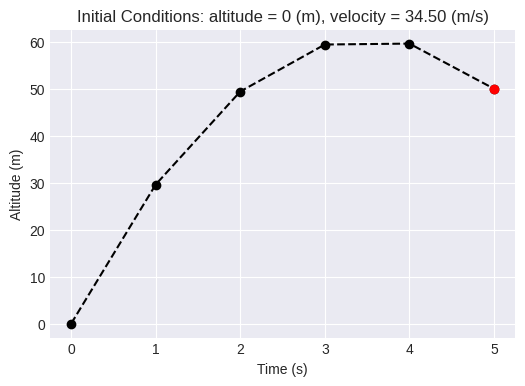

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(t, y[0], 'ko--')
plt.plot(tR, yR0, 'ro')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial Conditions: altitude = {yL0} (m), velocity = {yL1:.2f} (m/s)')
plt.show()

# Second Order BVP with Nonlinear Finite Difference Method
https://towardsdatascience.com/solving-non-linear-differential-equations-numerically-using-the-finite-difference-method-1532d0863755
https://kitchingroup.cheme.cmu.edu/blog/2013/03/08/A-nonlinear-BVP/

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# problem 2
# EDO: y'' = -2yy', 0 <= t <= 1
# BCs: y(0) = 0, y(1) = 1

# Discetized Equation,
# (y[i-1] - 2*y[i] + y[i+1])/h**2 = f(ti,yi,ypi) for i=1,2,...,N-1
# with: ypi = (y[i+1] - y[i-1])/(2*h)

f = lambda ti,yi,ypi: -2*yi*ypi
tL = 0
tR = 1
alpha = yL0 = 0
beta = yR0 = 1

N = 5
h = (tR - tL)/N
print('h = ', h)

t = np.linspace(tL, tR, N+1)
print('t = ', t)

# procuramos a altitude solução da equação,
# altitude'' - (-2*altitude*velocidade) = 0
# objective get altitude and returns: altitude'' - (-2*altitude*velocidade)
# fsolve is called with the objective function and an initial guess altitude_initial
# y'' = f(t,y,y') --> y'' - f(t,y,y') = 0
# y(tL) = alpha --> y(tL) - alpha = 0
# y(tR) = beta --> y(tR) - beta = 0

def objective(y):
    res = np.zeros(y.shape)
    for i in range(1,N):
      ti = t[i]
      yi = y[i]
      ypi = (y[i+1] - y[i-1])/(2*h)
      res[i] = (y[i-1] - 2*y[i] + y[i+1])/h**2 - f(ti,yi,ypi)
    res[0] = y[0] - alpha 
    res[-1] = y[-1] - beta
    return res

# we need an initial guess
y = np.zeros((2,N+1))
y[0] = alpha + (beta - alpha)/(tR - tL)*t
y[0] = fsolve(objective, y[0])
print('altitude = y[0] = ', y[0])

# computing the velocity profile, y[1] = ?
# intermediate points
for i in range(1,N):
  y[1][i] = (y[0][i+1] - y[0][i-1])/(2*h)

# initial velocity (Forward Euler)
'''
Linear Problem
(y[i-1] - 2*y[i] + y[i+1])/h**2 = p(ti) * (y[i+1] - y[i-1])/(2*h)
                                + q(ti) * y[i]
                                + r(ti)
Nonlinear Problem
(y[i-1] - 2*y[i] + y[i+1])/h**2 = f(ti, y[i], (y[i+1] - y[i-1])/(2*h))

for i = 0,
(y[-1] - 2*y[0] + y[1])/h**2 = f(tL, y[0], (y[1] - y[-1])/(2*h))

mixed central for y'' and forward-Euler for y' within f and central out
(y[-1] - 2*y[0] + y[1])/h**2 = f(tL, y[0], (y[1] - y[0])/h)
--> y[-1] = h**2 * f + 2*y[0] - y[1]
---> yL1 = (y[0][1] - y[0][-1])/(2*h)
'''
yL1 = (y[0][1] - y[0][0])/h # Forward Euler
print('Initial velocity, yL1 = ', yL1)

# final velocity
yR1 = (y[0][-1] - y[0][-2])/h # Backward Euler
print('Final velocity, yR1 = ', yR1)

y[1][0] = yL1
y[1][-1] = yR1
print('y[1] = ', y[1])

h =  0.2
t =  [0.  0.2 0.4 0.6 0.8 1. ]
altitude = y[0] =  [-5.50975755e-24  2.84471851e-01  5.38316522e-01  7.42814508e-01
  8.94410187e-01  1.00000000e+00]
Initial velocity, yL1 =  1.4223592539015435
Final velocity, yR1 =  0.5279490673769299
y[1] =  [1.42235925 1.34579131 1.14585664 0.89023416 0.64296373 0.52794907]


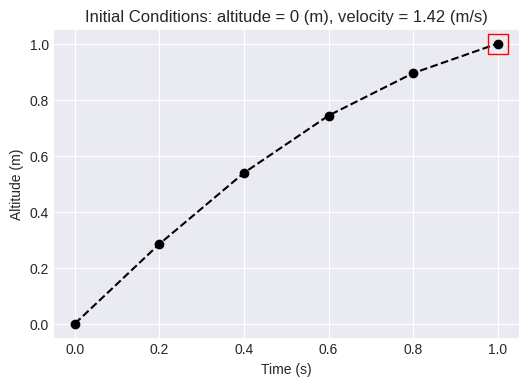

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

plt.figure(figsize = (6,4))
plt.plot(t, y[0], 'ko--')
plt.plot(tR, yR0, 'rs', markersize=14, markerfacecolor='none')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title(f'Initial Conditions: altitude = {yL0} (m), velocity = {yL1:.2f} (m/s)')
plt.show()